<a href="https://colab.research.google.com/github/bunnyband/sales-predictions/blob/main/12_Pandas_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

filename = ('/content/drive/MyDrive/sales_predictions.csv')

df = pd.read_csv(filename)

#df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# How many rows and columns?

df.shape

(8523, 12)

In [3]:
# What are the datatypes of each variable?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Are there duplicates? If so, drop any duplicates.

df.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
# Identify missing values. - Item Weight

missing_Item_Weight = pd.isnull(df["Item_Weight"])

df[missing_Item_Weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [6]:
# Identify missing values. - Outlet Size

missing_Outlet_Size = pd.isnull(df["Outlet_Size"])

df[missing_Outlet_Size]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [7]:
# Find and fix any inconsistent categories of data

df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [8]:
# Find and fix any inconsistent categories of data

df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [9]:
# Find and fix any inconsistent categories of data

df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [10]:
# Find and fix any inconsistent categories of data

df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [11]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean)

df['Item_Weight'].mean()

12.857645184136183

In [12]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean)

df['Item_Outlet_Sales'].mean()

2181.2889135750365

In [13]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
df["Item_Fat_Content"].replace("LF", "Low Fat", inplace=True)
df["Item_Fat_Content"].replace("low fat", "Low Fat", inplace=True)
df["Item_Fat_Content"].replace("reg", "Regular", inplace=True)

In [15]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Part 3 Using Seaborn

Text(0, 0.5, 'Item Types')

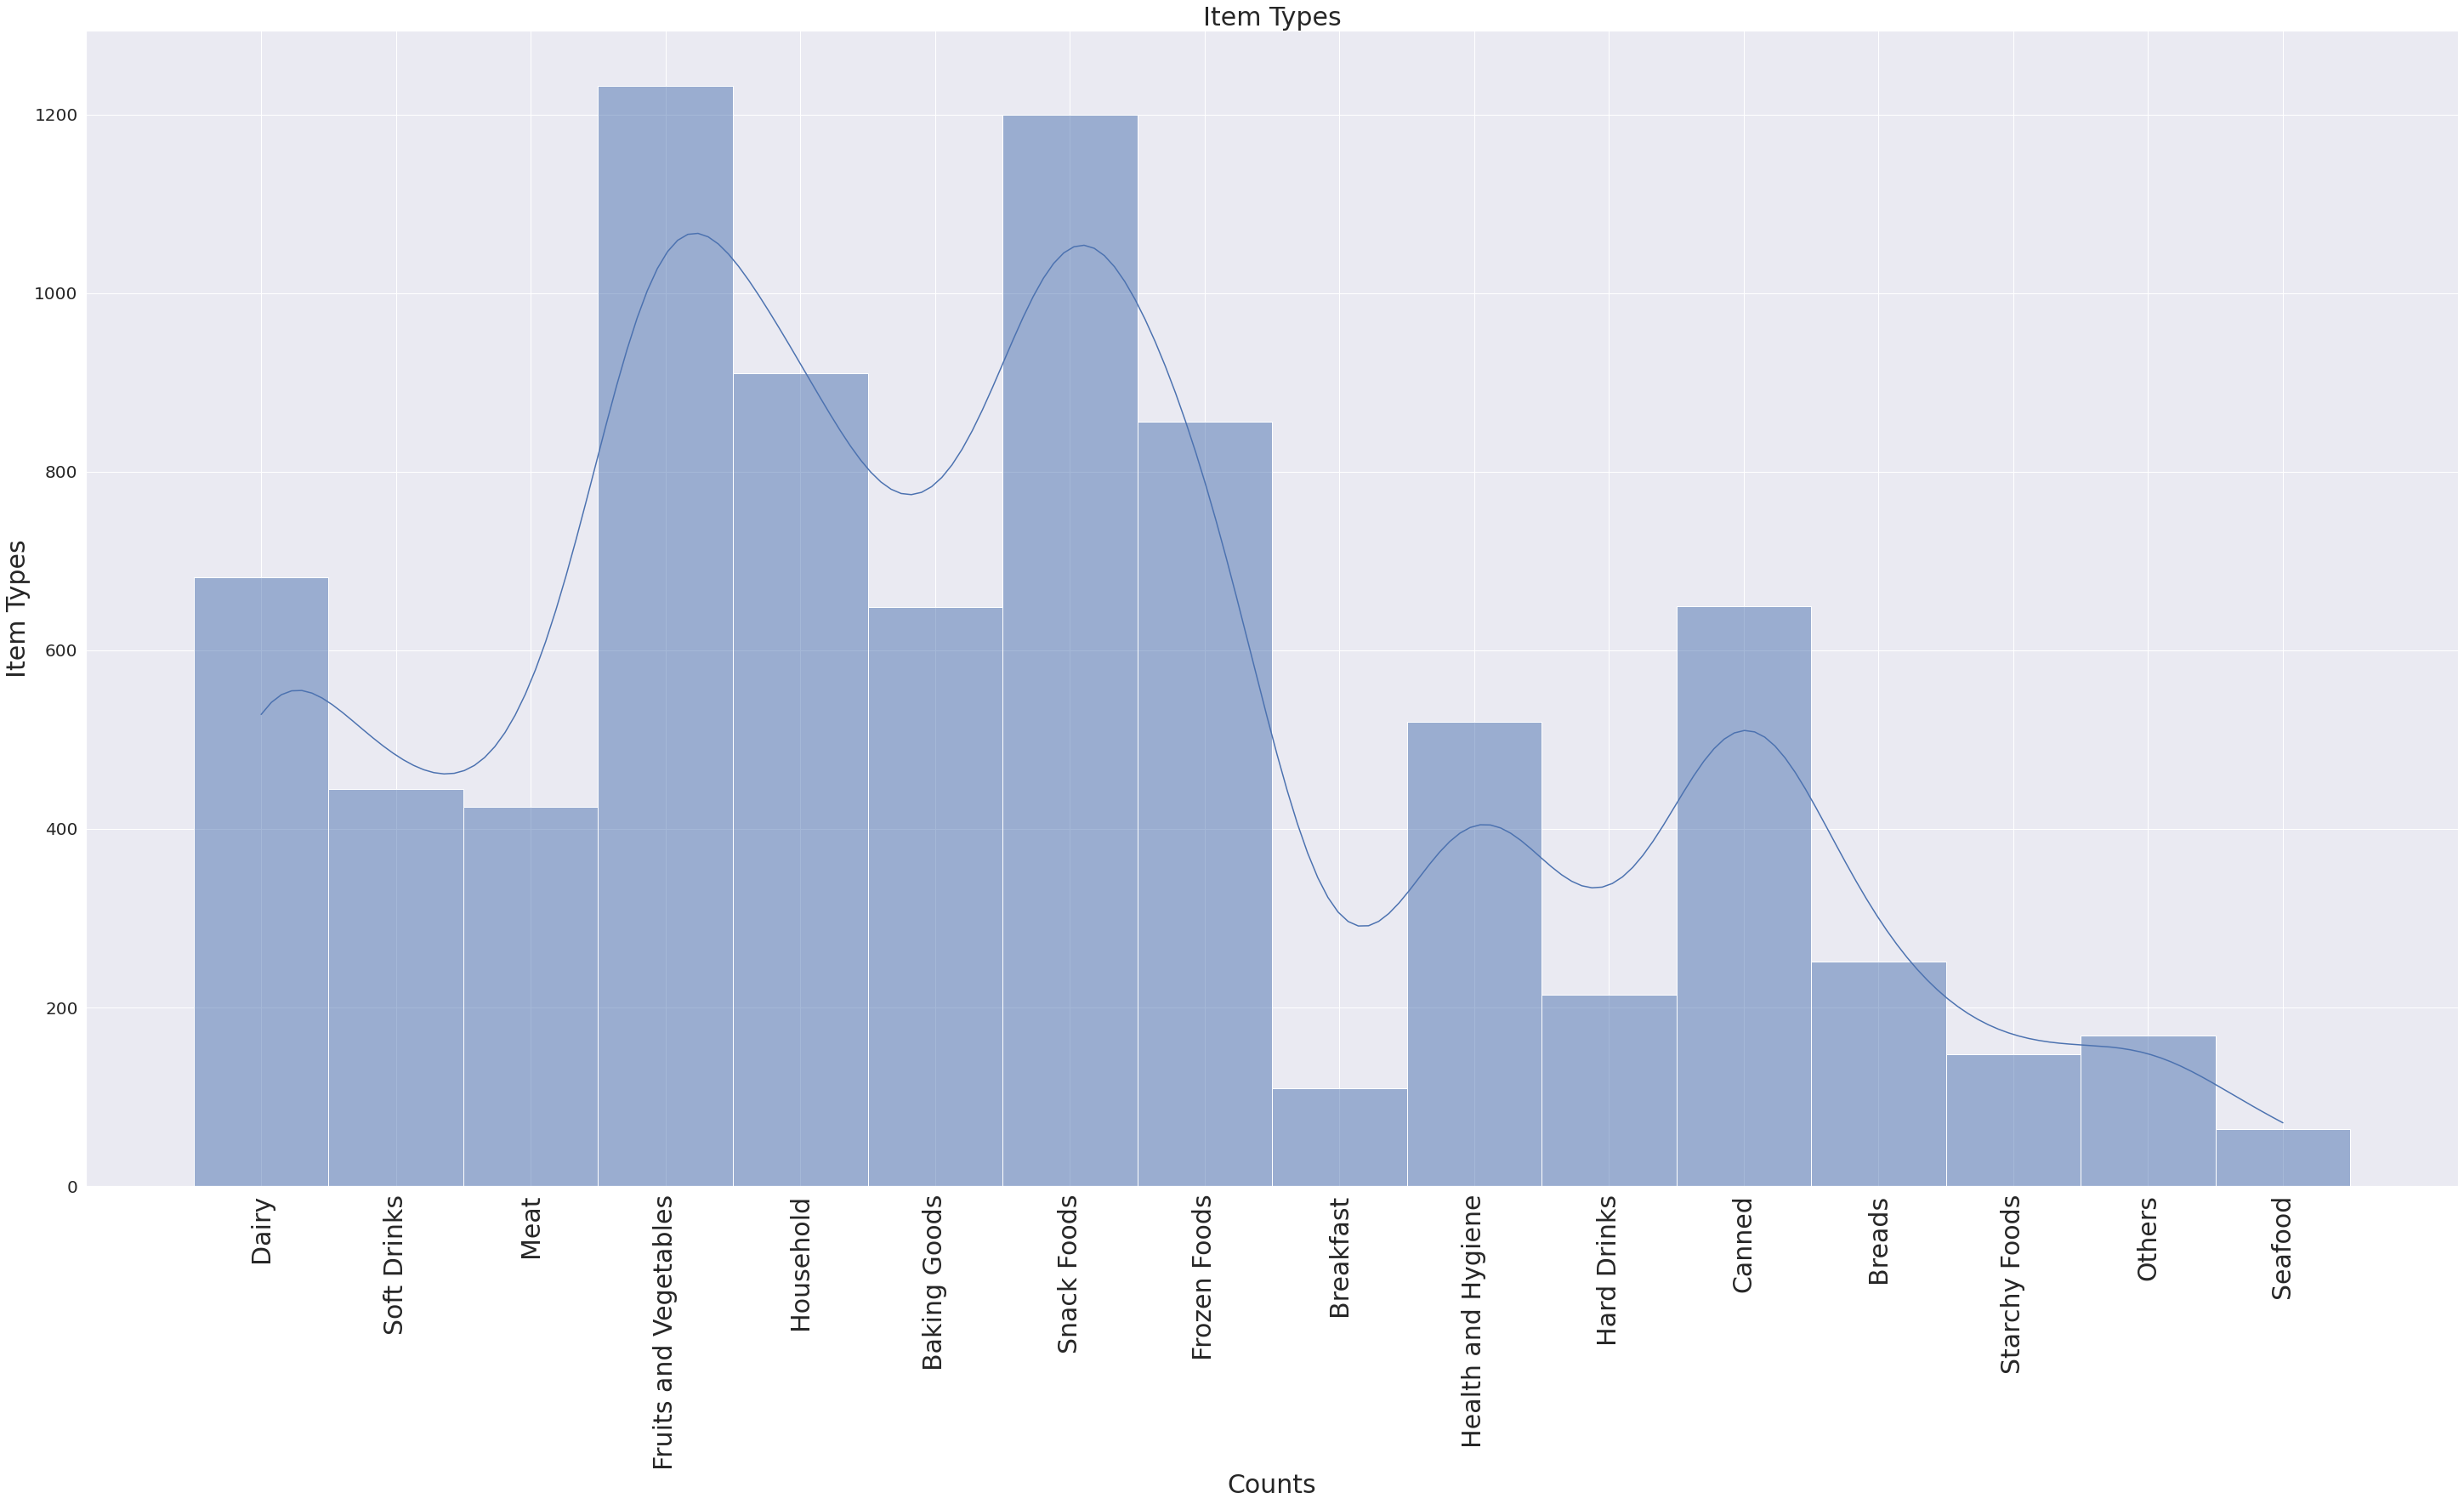

In [25]:
sns.histplot(x= 'Item_Type', data=df, kde = True, binwidth = 100);
sns.set(rc = {'figure.figsize':(50,25)})

plt.xticks(rotation=90, fontsize = 30)
plt.yticks(fontsize = 20)
plt.title('Item Types', fontsize = 30)
plt.xlabel('Counts', fontsize = 30)
plt.ylabel('Item Types', fontsize = 30)

Text(0, 0.5, '')

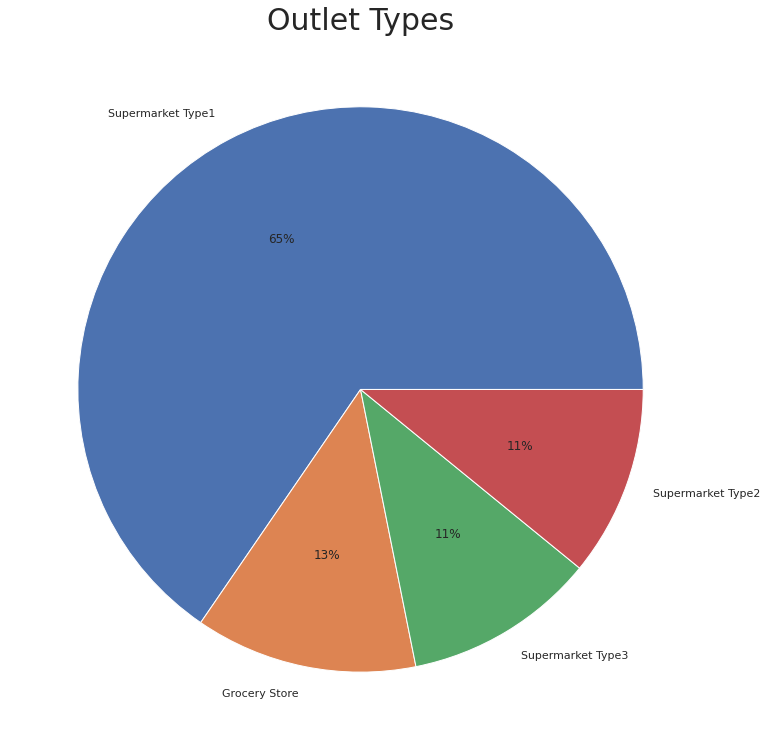

In [17]:
colors = sns.color_palette('pastel')

x1 = df['Outlet_Type'].value_counts()

x1.plot.pie(figsize = (25, 13), autopct='%.0f%%');
plt.title('Outlet Types', fontsize = 30)
plt.ylabel('', fontsize = 30)

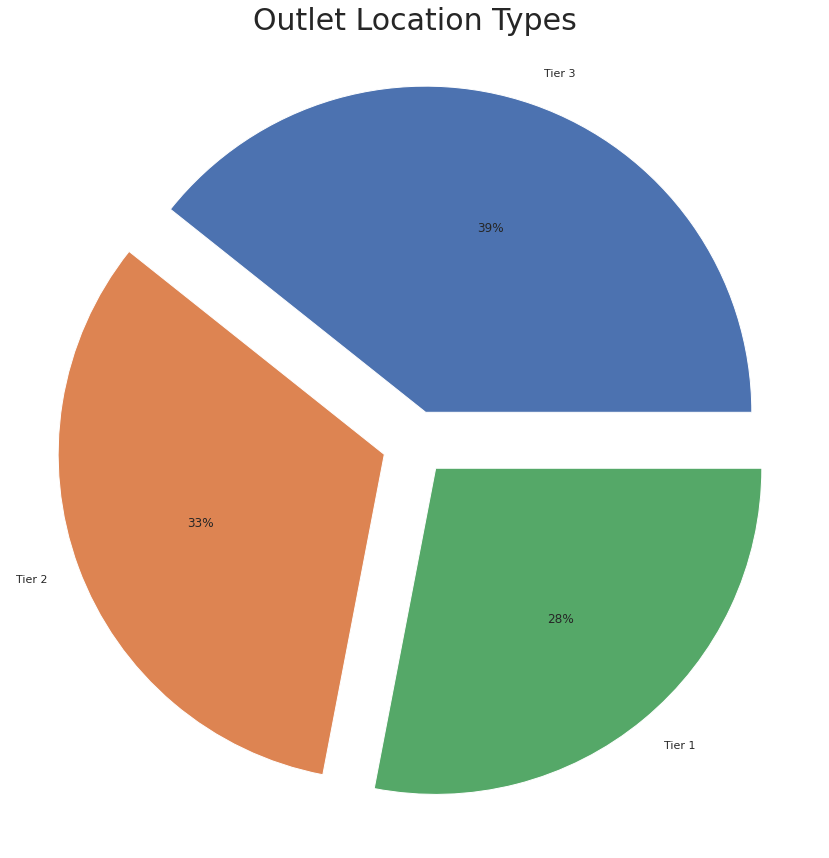

In [18]:
colors = sns.color_palette('pastel')
explode = (0.1, 0.1, 0.1)
x2 = df['Outlet_Location_Type'].value_counts()

x2.plot.pie(figsize = (30, 15), autopct='%.0f%%', explode = explode);
plt.title('Outlet Location Types', fontsize = 30);
plt.ylabel('', fontsize = 30);

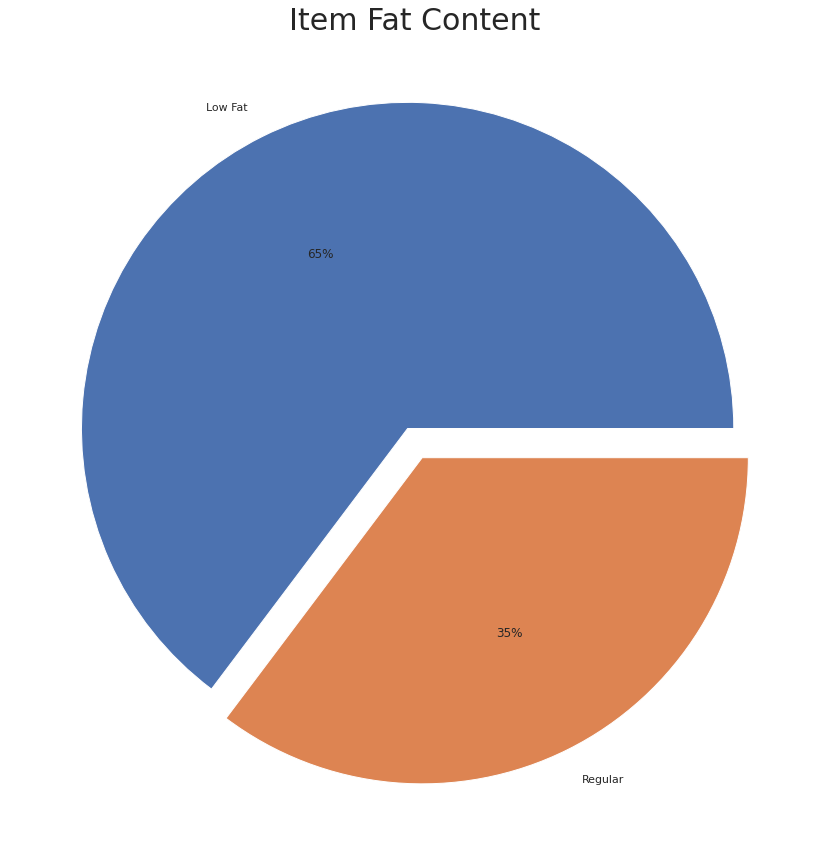

In [19]:
colors = sns.color_palette('pastel')
explode = (0.05, 0.05)
x3 = df['Item_Fat_Content'].value_counts()

x3.plot.pie(figsize = (30, 15), autopct='%.0f%%', explode = explode);
plt.title('Item Fat Content', fontsize = 30);
plt.ylabel('', fontsize = 30);

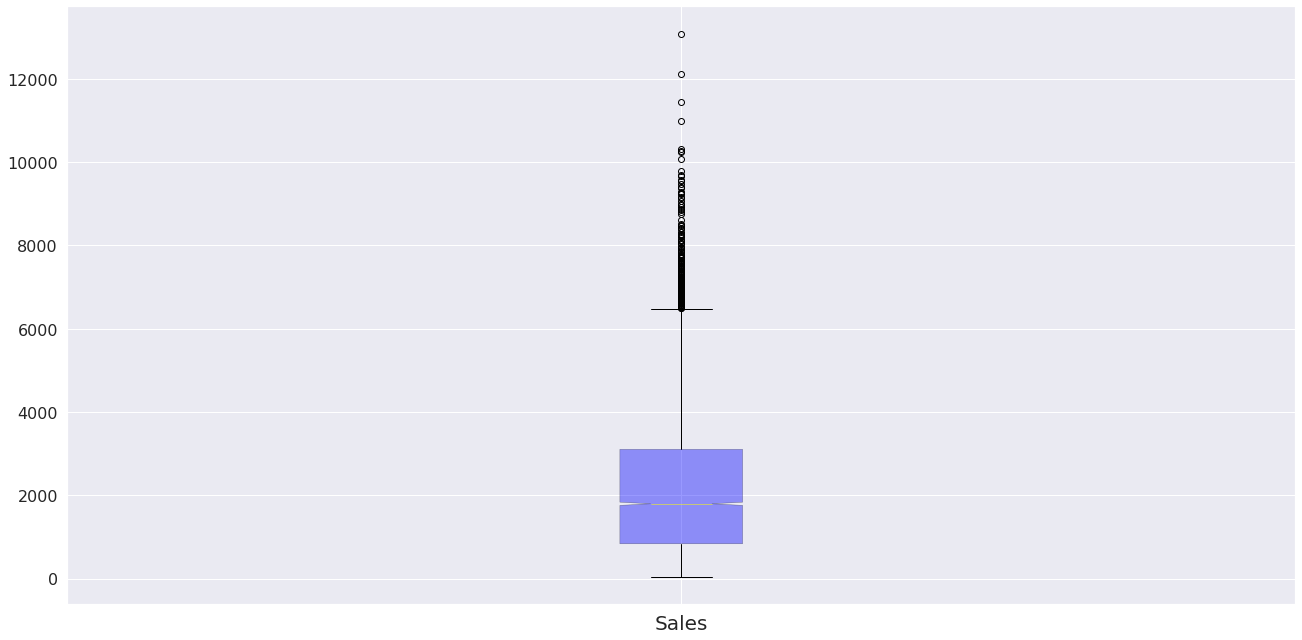

In [20]:
# df.loc[row, col]
Item_Outlet_Sales = df['Item_Outlet_Sales']

# create a boxplot
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (22,11))
plt.boxplot([Item_Outlet_Sales], labels=['Sales'], widths = 0.1,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=0.5, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=0.5, color='Black', facecolor = 'blue', alpha = .4), notch = True);


plt.xticks(fontsize = 20);
plt.yticks(fontsize = 16);

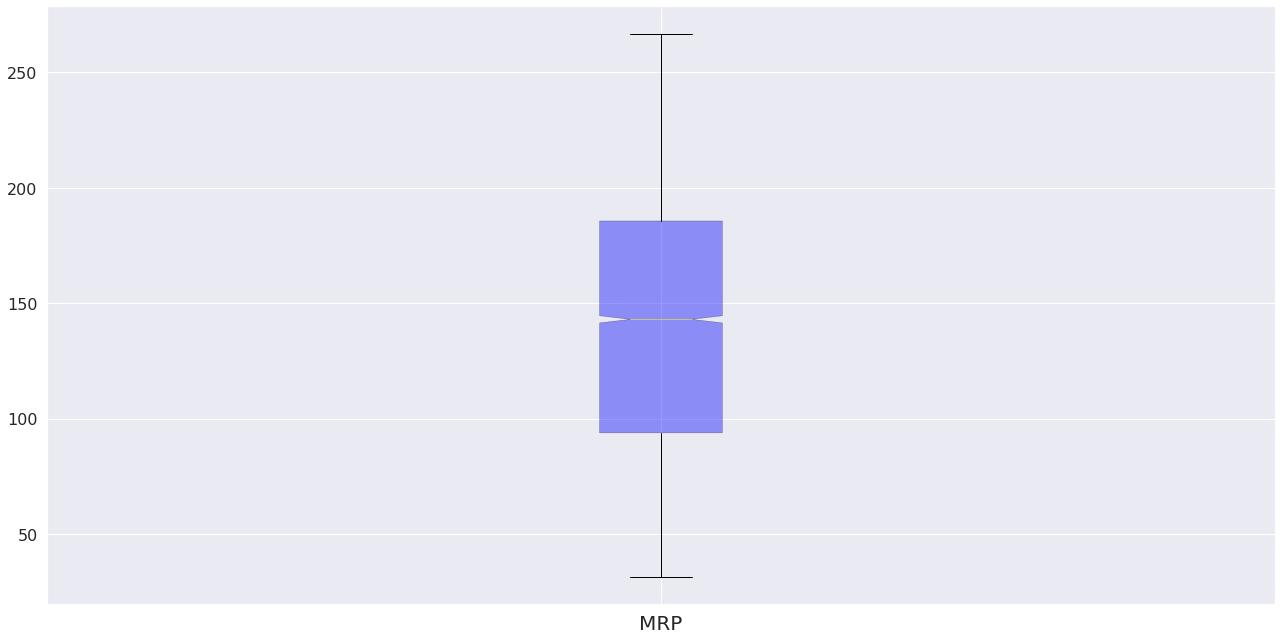

In [21]:
# df.loc[row, col]
Item_MRP = df['Item_MRP']

# create a boxplot
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (22,11))
plt.boxplot([Item_MRP], labels=['MRP'], widths = 0.1,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=0.5, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=0.5, color='Black', facecolor = 'blue', alpha = .4), notch = True);

plt.xticks(fontsize = 20);
plt.yticks(fontsize = 16);